In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_path = "data/"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pyarrow.parquet as pq

# Load the Parquet file
table = pq.read_table('/content/drive/MyDrive/data/transaction_data.parquet')

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving transactions_data.xlsx to transactions_data.xlsx


## EDA

In [ ]:
# Check for missing values
print(df.isnull().sum())


date_order       0
date_invoice     0
product_id       0
client_id        0
sales_net        0
quantity         0
order_channel    0
branch_id        0
dtype: int64


In [ ]:
df[df['sales_net']<0]

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
129,2017-09-26,2017-09-26,121848,1789606,-182.792500,25,at the store,5395
219,2017-09-26,2017-09-26,1435071,1791722,-169.456272,51,at the store,5167
621,2017-09-25,2017-09-27,693904,2167021,-36.901200,3,online,6184
936,2017-09-25,2017-09-26,133038,480303,-64.446000,5,at the store,210
1054,2017-09-25,2017-09-26,235896,1324117,-180.113000,5,by phone,10449
...,...,...,...,...,...,...,...,...
1048431,2017-10-19,2017-10-23,2257300,1125384,-75.651600,3,at the store,4105
1048439,2017-10-12,2017-10-19,516032,848962,-39.077000,5,at the store,3439
1048512,2017-10-03,2017-10-11,1006717,949202,-24.922800,3,at the store,5970
1048541,2017-10-18,2017-10-26,1268362,1705726,-83.869500,17,at the store,628


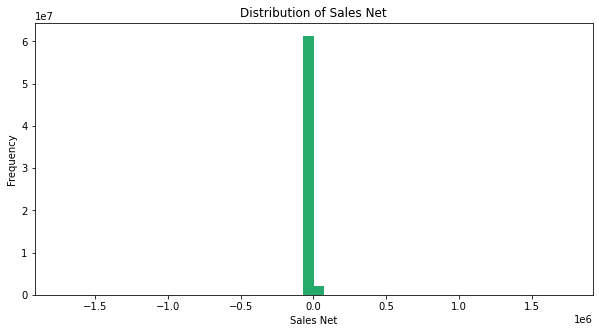

In [12]:
## Distribution sales_net

# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(df['sales_net'], bins=50, color="#25AA6C")
plt.xlabel('Sales Net')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Net')
plt.show()


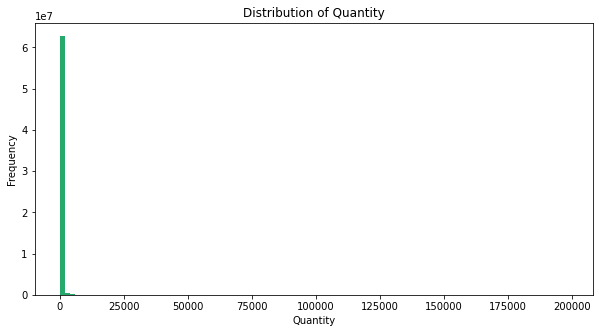

In [13]:
## Distribution of quantity values:

# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(df['quantity'], bins=100, color="#25AA6C")
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()


In [5]:
order_min = df['date_order'].min()
order_max = df['date_order'].max()

print(f'In our dataset, the first order recorded is on the {order_min} and the last order on the {order_max}')

In our dataset, the first order recorded is on the 2017-09-22 and the last order on the 2019-09-22


In [6]:
unique_clients = len(df['client_id'].unique())

print(f'In our dataset, we have {unique_clients} unique clients')

In our dataset, we have 170589 unique clients


In [7]:
unique_branches = len(df['branch_id'].unique())

print(f'In our dataset, we have {unique_branches} unique branches, or what we assume to be locations')

In our dataset, we have 582 unique branches, or what we assume to be locations


In [8]:
min_sales = df['sales_net'].min()
max_sales = df['sales_net'].max()
avg_sales = df['sales_net'].mean()

print(f'In our dataset, we the min sales net value is {min_sales}, the maximum is {max_sales}, and on average the net sales is {avg_sales}')

In our dataset, we the min sales net value is -1738816.56, the maximum is 1740456.0, and on average the net sales is 147.94159216014236


In [9]:
min_quant = df['quantity'].min()
max_quant = df['quantity'].max()
avg_quant = df['quantity'].mean()

print(f'In our dataset, we the min quantity is {min_quant}, the maximum is {max_quant}, and on average the net sales is {avg_quant}')

In our dataset, we the min quantity is 3, the maximum is 198001, and on average the net sales is 92.15658250566987


## Some visuals

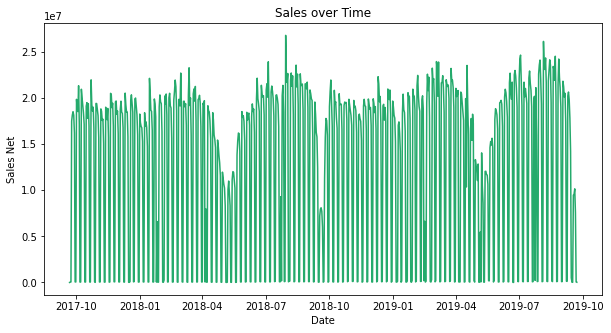

In [10]:
# Group the data by date
group_date = df.groupby('date_order')['sales_net'].sum().reset_index(name='sales_net')
group_date['date_order'] = pd.to_datetime(group_date['date_order'])

# Plot the line plot
plt.figure(figsize=(10,5))
plt.plot(group_date['date_order'], group_date['sales_net'], color="#25AA6C")
plt.xlabel('Date')
plt.ylabel('Sales Net')
plt.title('Sales over Time')
plt.show()


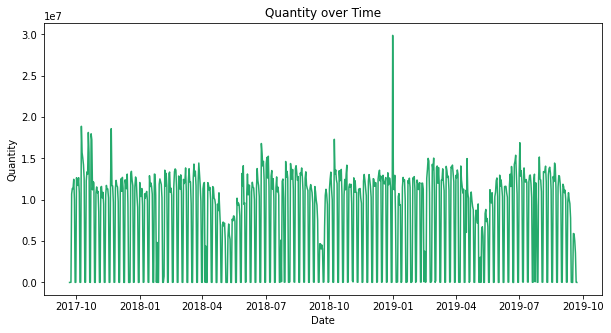

In [11]:
# Group the data by date
group_date_quant = df.groupby('date_order')['quantity'].sum().reset_index(name='quantity')
group_date_quant['date_order'] = pd.to_datetime(group_date_quant['date_order'])

# Plot the line plot
plt.figure(figsize=(10,5))
plt.plot(group_date_quant['date_order'], group_date_quant['quantity'], color="#25AA6C")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity over Time')
plt.show()


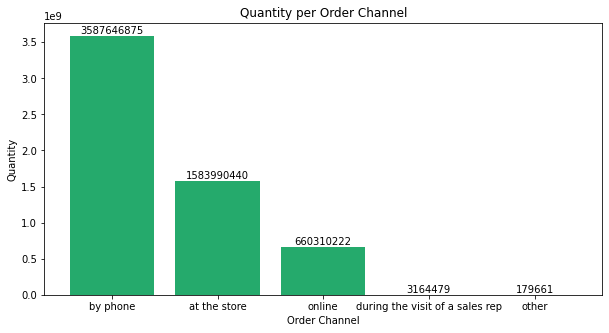

In [ ]:
# Group the data by channel
group_channel = df.groupby('order_channel')['quantity'].sum().reset_index(name='quantity')
# Sort the dataframe by quantity in descending order
group_channel = group_channel.sort_values(by='quantity', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10,5))
bars = plt.bar(group_channel['order_channel'], group_channel['quantity'], color="#25AA6C")
plt.xlabel('Order Channel')
plt.ylabel('Quantity')
plt.title('Quantity per Order Channel')

# Add the sum quantity as a label above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()


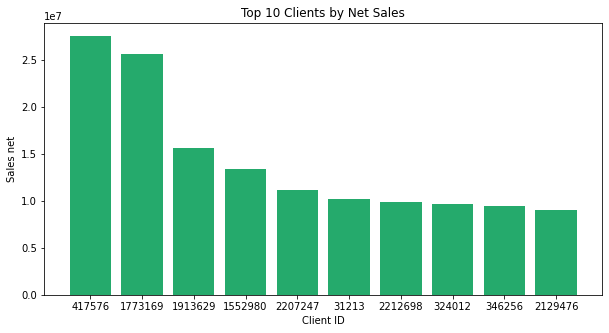

In [ ]:
# Group the data by client_id
group_sales = df.groupby('client_id')['sales_net'].sum().reset_index(name='sales_net')

# Get the top 10 clients based on the total sales_net
top10_sales = group_sales.nlargest(10, 'sales_net')

top10_sales['client_id'] = top10_sales['client_id'].astype(str)

# Plot the bar plot
plt.figure(figsize=(10,5))
plt.bar(top10_sales['client_id'], top10_sales['sales_net'], color="#25AA6C")
plt.xlabel('Client ID')
plt.ylabel('Sales net')
plt.title('Top 10 Clients by Net Sales')
plt.show()


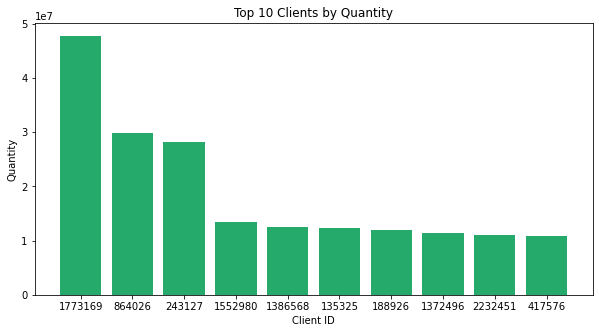

In [ ]:
group_order = df.groupby('client_id')['quantity'].sum().reset_index(name='quantity')

# Get the top 10 clients based on the total quantity
top10 = group_order.nlargest(10, 'quantity')
top10['client_id'] = top10['client_id'].astype(str)


# Plot the bar plot
plt.figure(figsize=(10,5))
plt.bar(top10['client_id'], top10['quantity'], color="#25AA6C")
plt.xlabel('Client ID')
plt.ylabel('Quantity')
plt.title('Top 10 Clients by Quantity')
#plt.xticks(top10['client_id'].index, top10['client_id'], rotation=45)
plt.show()

In [ ]:
# Aggregate the data by product_id and branch_id, and calculate the total sales for each product and branch
df_sales = df.groupby(['product_id', 'branch_id'])['sales_net'].sum().reset_index()

# Sort the aggregated data in descending order based on sales to get the top 10 products and branches
top_products = df_sales.sort_values('sales_net', ascending=False).head(10)['product_id']
top_branches = df_sales.sort_values('sales_net', ascending=False).head(10)['branch_id']

# Sort the aggregated data in ascending order based on sales to get the bottom 10 products and branches
bottom_products = df_sales.sort_values('sales_net', ascending=True).head(10)['product_id']
bottom_branches = df_sales.sort_values('sales_net', ascending=True).head(10)['branch_id']

# Print the results
print('Top 10 products by sales: ', list(top_products))
print('Top 10 branches by sales: ', list(top_branches))
print('Bottom 10 products by sales: ', list(bottom_products))
print('Bottom 10 branches by sales: ', list(bottom_branches))


# More exploration with polar library because of the size of the dataset

In [1]:
pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import polars as pl

df = pl.read_parquet('/content/drive/MyDrive/data/transaction_data.parquet')

In [4]:
df = df.with_columns(pl.col('date_order').str.strptime(pl.Date, fmt="%Y-%m-%d"))
df = df.with_columns(pl.col('date_order').dt.year().alias('year'))


In [14]:
client_count = df.groupby('year').agg(pl.col('client_id').unique().count().alias('Nb Clients'))
client_count

year,Nb Clients
i32,u32
2018,142951
2019,130750
2017,105583


In [17]:
data = {'year':[2017, 2018, 2019], 'Nb Unique Clients':[105583, 142951, 130750]}
 
# Create DataFrame
df = pd.DataFrame(data)
df

,year,Nb Unique Clients
0,2017,105583
1,2018,142951
2,2019,130750


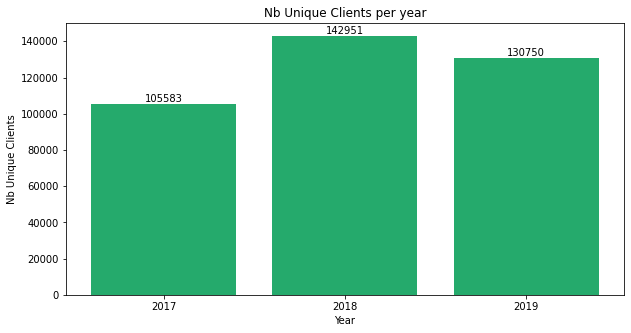

In [22]:
df['year'] = df['year'].astype(str)


# Plot the bar plot
plt.figure(figsize=(10,5))
bars = plt.bar(df['year'], df['Nb Unique Clients'], color="#25AA6C")
plt.xlabel('Year')
plt.ylabel('Nb Unique Clients')
plt.title('Nb Unique Clients per year')

# Add the sum Nb Unique Clients as a label above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()